In [122]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/test.csv
/kaggle/input/train.csv


In [123]:
data = pd.read_csv('/kaggle/input/train.csv')

In [124]:
#displaying a segment of data
data.head(5)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [125]:
# counting the number of Hate tweets and non hate tweets in the dataset.

print("Total number of tweets: {}\n".format(data['id'].count()))
print("Total number of hate tweets: {}\n".format(data['id'][data['label'] == 1].count()))
print("Total number of non hate tweets: {}\n".format(data['id'][data['label'] == 0].count()))


Total number of tweets: 31962

Total number of hate tweets: 2242

Total number of non hate tweets: 29720



We will clean and process the dataset by

1. Extracting the hastags as another feature
1. Removing the mentions as @user
2. removing everything except words

In [126]:
#extracting the hashtags
hashtags = data['tweet'].str.extractall('#(?P<hashtag>[a-zA-Z0-9_]+)').reset_index().groupby('level_0').agg(lambda x: ' '.join(x.values))

data.loc[:, 'hashtags'] = hashtags['hashtag']

data['hashtags'].fillna('', inplace=True)


data.head()

,id,label,tweet,hashtags
0,1,0,@user when a father is dysfunctional and is s...,run
1,2,0,@user @user thanks for #lyft credit i can't us...,lyft disapointed getthanked
2,3,0,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,model
4,5,0,factsguide: society now #motivation,motivation


In [127]:
data['tweet'] = data['tweet'].str.replace('@[a-zA-Z0-9_]+', ' ')

data['tweet'] = data['tweet'].str.replace('#(?P<hashtag>[a-zA-Z0-9_]+)', ' ')

data['tweet'] = data['tweet'].str.replace('[^a-zA-Z]', ' ')

data.head()

,id,label,tweet,hashtags
0,1,0,when a father is dysfunctional and is so se...,run
1,2,0,thanks for credit i can t use cause they...,lyft disapointed getthanked
2,3,0,bihday your majesty,
3,4,0,i love u take with u all the time in ur ...,model
4,5,0,factsguide society now,motivation


After cleansing of the tweets we pre-process the tweets by removing stop words

In [128]:
# tokenization

tokens = []
i = 0
for tweets in data['tweet']:
    T_tokens = tweets.split(' ')
    for item in T_tokens:
        if item == '':
            T_tokens.remove(item)
    tokens.append(T_tokens)
    i = i+1
tokens[10]

['consumer',
 'price',
 'index',
 'mom',
 'climbed',
 'from',
 'previous',
 'to',
 '',
 '',
 'in',
 'may',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [129]:
# removing stopwords
import nltk

stopwords = nltk.corpus.stopwords.words('english')
_tokens_processed = []
i = 0
for t in tokens:
    _t= [word for word in t if word.lower() not in stopwords]
    _tokens_processed.append(_t)
    #print("{}\n".format(_t))


print("{}".format(tokens[5]))
print("{}".format(_tokens_processed[5]))
#for t in token


['huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there', '', '', '', '', '']
['huge', 'fan', 'fare', 'big', 'talking', 'leave', 'chaos', 'pay', 'disputes', 'get', '', '', '', '', '']


In [144]:
#generating single list of words for wordcloud

listOfWords_all = []
listOfWords_hate = []

i = 0;
for l in _tokens_lemmed:
    for word in l:
        if word not in listOfWords_all:
            listOfWords_all.append(word)
            if data.iloc[i, 1] == 1:
                listOfWords_hate.append(word)
    i = i+1
print(listOfWords_hate[0:10])

['call', 'middl', 'build', 'wall', 'chant', 'comment', 'retweet', 'agre', 'lumpi', 'say']


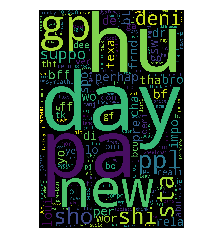

In [147]:
#generating word cloud for all tweets

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wcloud = WordCloud(background_color = 'black', width = 2000, height = 3000 ).generate(" ".join(listOfWords_all))

plt.imshow(wcloud)
plt.axis('off')
#plt.label('Word Cloud for all tweets')
plt.show()

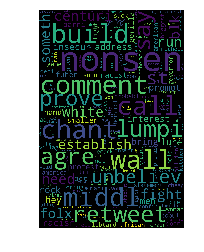

In [148]:
#hate word cloud
wcloud = WordCloud(background_color = 'black', width = 2000, height = 3000 ).generate(" ".join(listOfWords_hate))

plt.imshow(wcloud)
plt.axis('off')
#plt.label('Word Cloud for all tweets')
plt.show()

In [132]:
#stemming

stemmer = nltk.stem.SnowballStemmer('english', ignore_stopwords = True)

_tokens_stemmed = []

for t in _tokens_processed:
    temp = []
    for _words in t:
        temp.append(stemmer.stem(_words))
    _tokens_stemmed.append(temp)
print(_tokens_stemmed[5])

['huge', 'fan', 'fare', 'big', 'talk', 'leav', 'chao', 'pay', 'disput', 'get', '', '', '', '', '']


In [133]:
# lemmatization

from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()


_tokens_lemmed = []

for t in _tokens_stemmed:
    temp = []
    for _words in t:
        temp.append(lemm.lemmatize(_words))
    _tokens_lemmed.append(temp)
print(_tokens_lemmed[5])

['huge', 'fan', 'fare', 'big', 'talk', 'leav', 'chao', 'pay', 'disput', 'get', '', '', '', '', '']


In [149]:
#vectorizing the tweets

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), ngram_range=(1,3), min_df = 10)

features = vectorizer.fit_transform(data['tweet'])

In [152]:
#SVM classificaion

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import f1_score

X_train, X_test, y_train, y_test = train_test_split(features, data.label)

In [154]:
params = {'C': [1000, 3000, 9000, 15000]}

svc = GridSearchCV(SVC(kernel = 'rbf', gamma = 'auto'), param_grid = params, scoring='f1', cv = 3, n_jobs = -1)
svc.fit(X_train, y_train)

print("Best parameters found were {} with F1 score of {:.2f}".format(
    svc.best_params_,
    svc.best_score_
))
predictions = svc.predict(X_test)
print("\nF1 test score for SVC: {:.2f}".format(f1_score(y_test, predictions)))

Best parameters found were {'C': 9000} with F1 score of 0.48

F1 test score for SVC: 0.49
